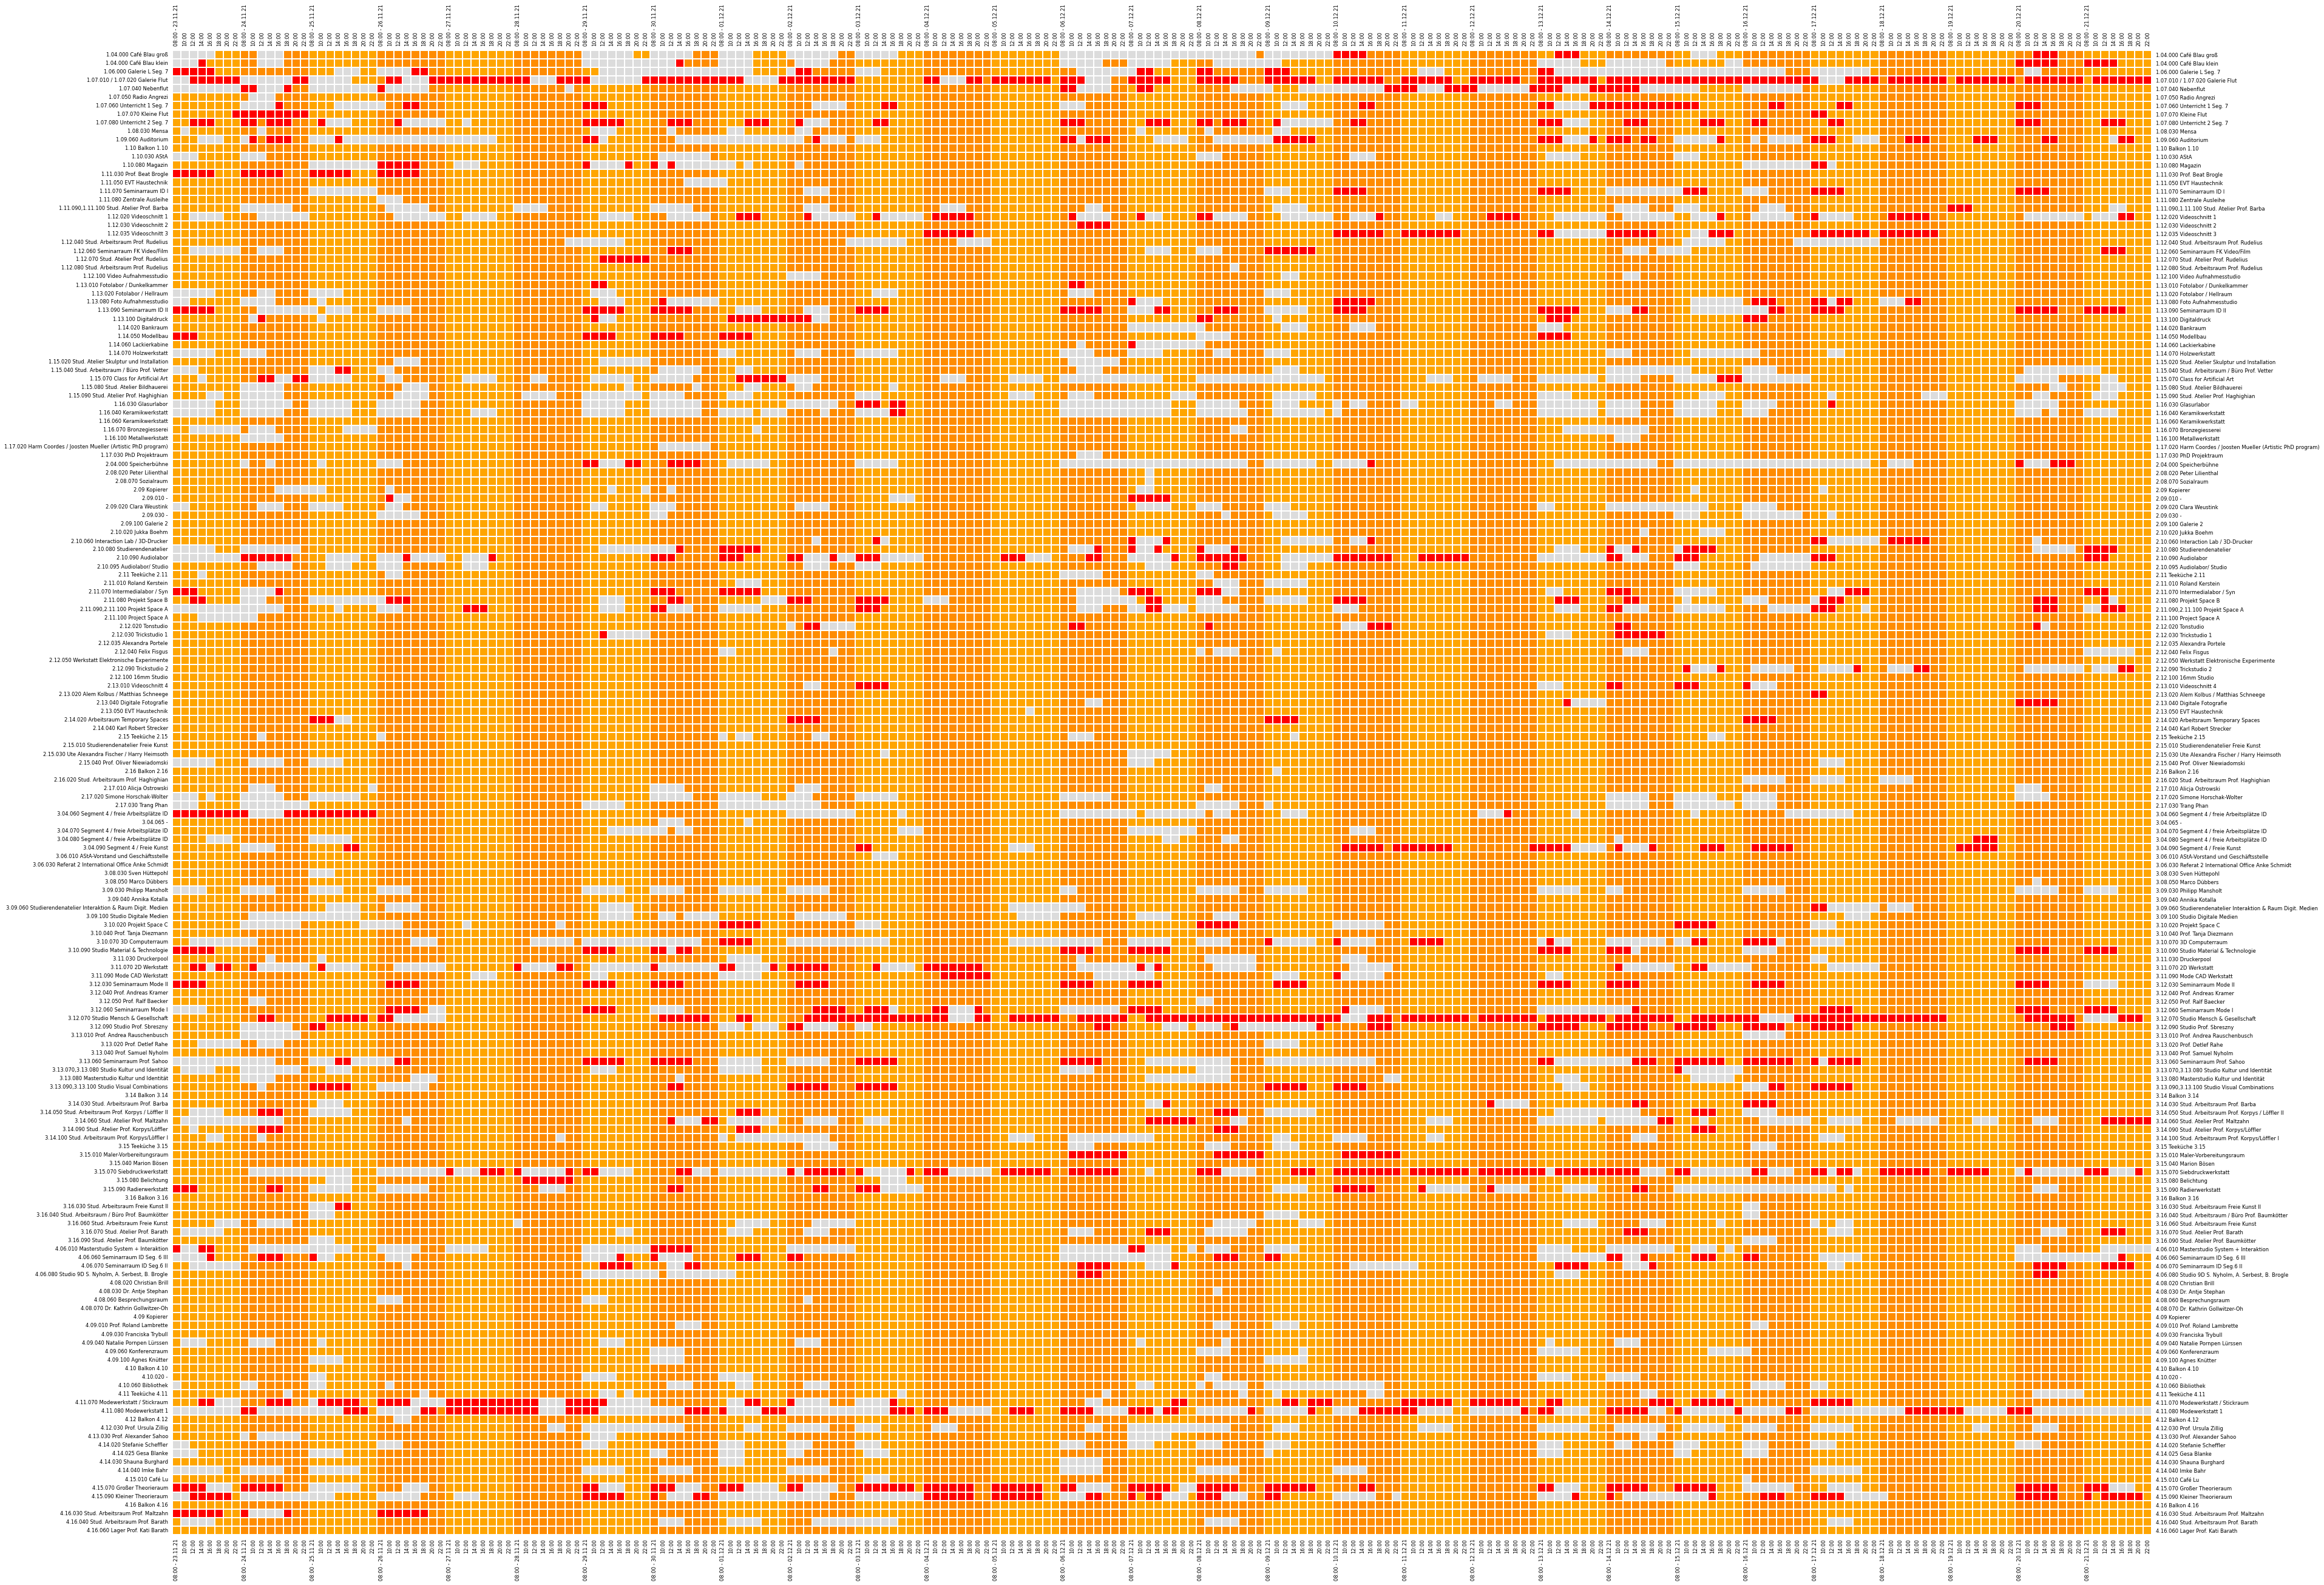

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates;

def combine_values(x):
    even = x.slot.timetuple().tm_yday % 2 == 0
    if x.has_checkin == 0 and x.has_reservation == 0 and even: return 1; # vacant
    if x.has_checkin == 0 and x.has_reservation == 0: return 0; # vacant
    if x.has_checkin == 0 and x.has_reservation > 0: return 2; # blocked
    if x.has_checkin > 0 and even: return 3; # in use
    return 3
    
    


df = pd.read_csv('data/xi_reservable.csv') 
df['slot'] = pd.to_datetime(df['slot'], format='%Y-%m-%d %H:%M:%S', errors='raise')
# filter slots from 9 - 23
df = df[(df['slot'].dt.hour < 24) & (df['slot'].dt.hour >= 8)]
df['value'] = df.apply(combine_values, axis = 1)
pivot = df.pivot_table(index=df['slot'],columns=df['n'],values=['value'],aggfunc='sum',fill_value=0)
# pivot = pivot.iloc[:30,:10]
# print (pivot.shape)
# fig,ax=plt.subplots(figsize=(50,10))
fig,ax=plt.subplots(figsize=(100 * 0.66,45))

pivot.columns = [col[1] for col in pivot.columns.values]

#cbar
vmap = ["Keine Aktivität", "Min. 1 Buchung", "Min. 1 Checkin", "Min. 1 Checkin & min. 1 Buchung", "Keine Aktivität"]
cbar_kws=dict(use_gridspec=False,location="right",pad=0.04,shrink=0.125)

ax = sns.heatmap(pivot.T, xticklabels=1, cmap=["orange", "darkorange", "red", "gainsboro"], cbar=False,fmt="d", linewidths=2,square=True,linecolor="white")

# colorbar labels
# n = len(vmap)
# colorbar = ax.collections[0].colorbar
# # The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
# r = colorbar.vmax - colorbar.vmin
# colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
# colorbar.set_ticklabels(vmap)

#graph labels
labels = [pd.to_datetime(str(tick)) for tick in pivot.index.values]
labels = [tick.hour == 8 and tick.strftime("%H:%M - %d.%m.%y") or tick.strftime("%H:%M") for tick in labels];
ax.set_xticklabels(labels=labels)
ax.xaxis.set_tick_params(rotation=90,labelsize='small', labelleft=True, labelright=True, bottom=False, top=False, left=False, right=False)
ax.yaxis.set_tick_params(rotation=0,labelsize='small', labelbottom=True, labeltop=True, bottom=False, top=False, left=False, right=False)
ax.set_ylabel('')
ax.set_xlabel('')

# ax.set_title("Raumaktivität Dechanatsstr.", fontsize = 30)

# plt.show()
plt.savefig('xi.png', dpi=300)